# Box and violin plots

In [73]:
import os
from dotenv import load_dotenv, find_dotenv

import datetime
import numpy as np
from scipy import stats
import csv
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

import seaborn as sns

In [52]:
# makes the inline-figures in notebooks look crisper
%config InlineBackend.figure_format = 'svg'

In [53]:
load_dotenv(find_dotenv(usecwd=True));
data_folder=os.getenv('DATA_FOLDER')

In [54]:
figsize_rect = (9, 5)
figsize_square = (8, 8)

fs_xl = 36 # titles
fs_l = 24 # subtitles
fs_m = 16 # axes and tick labels
fs_s = 14 # small stuff

In [55]:
def stamp(ax, color, alpha, label, clip_on=False, linewidth=5, fontsize=fs_m):
    ax.text(1.0, 1.0, label + "  ", color=color, alpha=alpha, fontsize=fontsize, weight='bold',
            va='top', ha='right', transform=ax.figure.transFigure, clip_on=clip_on)
    ax.add_patch(mpl.patches.ConnectionPatch(xyA=(1, 0), xyB=(1, 1), coordsA="figure fraction", 
                                         coordsB="figure fraction", axesA=ax, axesB=ax, 
                                         color=color, alpha=alpha, linewidth=linewidth,
                                         capstyle='butt', transform=ax.figure.transFigure))

def stamp_good(ax):
    stamp(ax, "olivedrab", 0.7, "good")

def stamp_phantom(ax):
    stamp(ax, "transparent", 0, "")

def stamp_bad(ax):
    stamp(ax, "#d02138", 1, "bad")

def stamp_wrong(ax):
    stamp(ax, "#8E202C", 1, "wrong")

def stamp_ugly(ax):
    stamp(ax, "#DC9515", 1, "ugly")

In [91]:
lincoln_df = pd.read_csv(os.path.join(data_folder, 'dataviz_data-raw', 'ggridges', 'lincoln_df.csv'))

# Define the order of the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'month_short' column to a categorical variable with the specified order
lincoln_df['month_short'] = pd.Categorical(lincoln_df['month_short'],
                                           categories=month_order, ordered=True)

# Calculate the mean and standard deviation
lincoln_df['Mean Temperature [F]'] = lincoln_df['Mean Temperature [F]'].astype(float)

lincoln_df

,Unnamed: 0,CST,Max Temperature [F],Mean Temperature [F],Min Temperature [F],Max Dew Point [F],Mean Dew Point [F],Min Dewpoint [F],Max Humidity,Mean Humidity,...,Min Visibility [Miles],Max Wind Speed [MPH],Mean Wind Speed[MPH],Max Gust Speed [MPH],Precipitation [In],CloudCover,Events,WindDir [Degrees],Month,month_short
0,1,2016-1-1,37,24.0,11,19.0,13.0,8.0,88.0,68.0,...,10.0,20.0,9.0,23.0,0,0.0,NaN,280.0,January,Jan
1,2,2016-1-2,41,23.0,5,22.0,14.0,4.0,100.0,72.0,...,10.0,15.0,6.0,18.0,0,0.0,NaN,312.0,January,Jan
2,3,2016-1-3,37,23.0,8,23.0,15.0,8.0,92.0,73.0,...,10.0,13.0,5.0,14.0,0,0.0,NaN,330.0,January,Jan
3,4,2016-1-4,30,17.0,4,24.0,13.0,2.0,92.0,82.0,...,6.0,17.0,7.0,23.0,0,1.0,NaN,155.0,January,Jan
4,5,2016-1-5,38,29.0,19,29.0,25.0,19.0,96.0,83.0,...,5.0,22.0,13.0,28.0,0,4.0,NaN,178.0,January,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,2016-12-27,48,29.0,10,22.0,16.0,7.0,84.0,55.0,...,10.0,18.0,6.0,22.0,0,0.0,Rain,212.0,December,Dec
362,363,2016-12-28,49,36.0,22,22.0,16.0,7.0,84.0,52.0,...,10.0,26.0,12.0,32.0,0,0.0,NaN,306.0,December,Dec
363,364,2016-12-29,44,30.0,16,12.0,9.0,5.0,62.0,41.0,...,10.0,30.0,16.0,38.0,0,0.0,NaN,301.0,December,Dec
364,365,2016-12-30,62,38.0,14,23.0,15.0,9.0,75.0,46.0,...,2.0,20.0,7.0,24.0,0,0.0,NaN,292.0,December,Dec


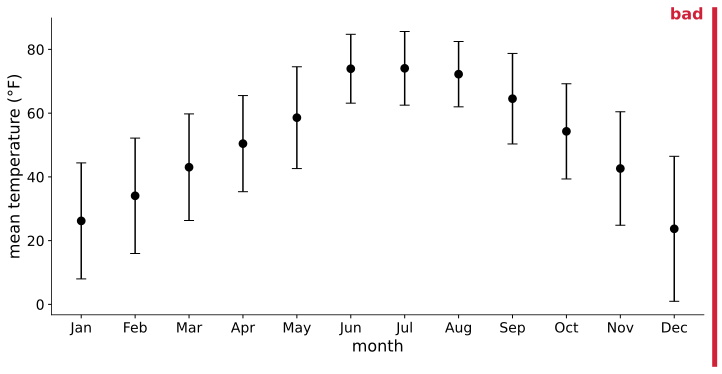

In [90]:
monthly_stats = lincoln_df.groupby('month_short', observed=False)['Mean Temperature [F]'].agg(['mean', 'std'])

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(x=monthly_stats.index, y='mean', data=monthly_stats, linestyle='none', capsize=0.1,
              color='black', ax=ax)

# Add the error bars
ax.errorbar(monthly_stats.index, monthly_stats['mean'], yerr=2*monthly_stats['std'],
            fmt='o', color='black', capsize=5)

# Set the labels
ax.set_xlabel('month', fontsize=fs_m)
ax.set_ylabel('mean temperature (°F)', fontsize=fs_m)

ax.tick_params(axis='both', bottom=True, left=True, labelsize=fs_s, color='black',
                width=1.0)

sns.despine()

plt.tight_layout()

stamp_bad(ax)
plt.show()

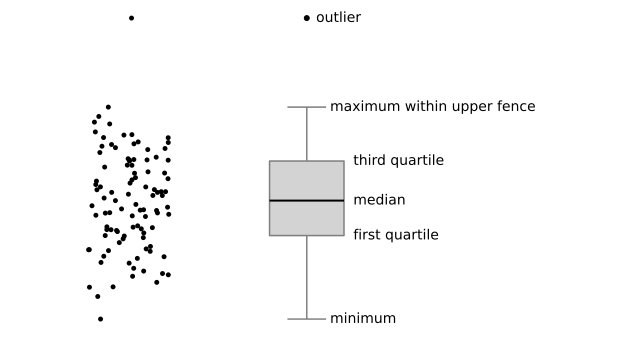

In [104]:
# Set the seed
np.random.seed(3423)

# Generate the data
y = np.concatenate([np.random.normal(size=100), [3.4]])
df = pd.DataFrame({'y': y})

# Calculate the boxplot statistics
Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
min_val = np.min(y[y >= lower_bound])
max_val = np.max(y[y <= upper_bound])
median = np.median(y)
outliers = y[(y < lower_bound) | (y > upper_bound)]

# Create the labels DataFrame
labels_df = pd.DataFrame({
    'y': [min_val, Q1, median, Q3, max_val, outliers[0]],
    'x': [0.25, 0.5, 0.5, 0.5, 0.25, 0.1],
    'label': ["minimum", "first quartile", "median", "third quartile", "maximum within upper fence", "outlier"]
})

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize_rect, gridspec_kw={'width_ratios': [0.65, 1]})

# Scatter plot
sns.stripplot(x=np.zeros(len(y)), y=y, jitter=0.2, color='black', ax=ax1)
ax1.set_xlim(-0.6, 0.6)
ax1.set_ylim(-2.6, 3.6)

ax1.set_xticks([])
ax1.set_yticks([])
ax1.tick_params(axis='both', bottom=False, left=False)

# Remove axis line
ax1.spines[:].set_visible(False)

# Box plot
sns.boxplot(x=np.ones(len(y)), y=y, color='lightgrey', linewidth=1.5,
            medianprops={'color': 'black', 'linewidth': 2},
            flierprops={'marker': 'o', 'markerfacecolor': 'black', 'markersize': 5,
                        'markeredgecolor': 'black'},
            ax=ax2)
for i, row in labels_df.iterrows():
    ax2.text(row['x'], row['y'], row['label'], ha='left', va='center', fontsize=14)
ax2.set_xlim(-0.5, 3.5)
ax2.set_ylim(-2.6, 3.6)

ax2.set_xticks([])
ax2.set_yticks([])
ax2.tick_params(axis='both', bottom=False, left=False)

ax2.spines[:].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

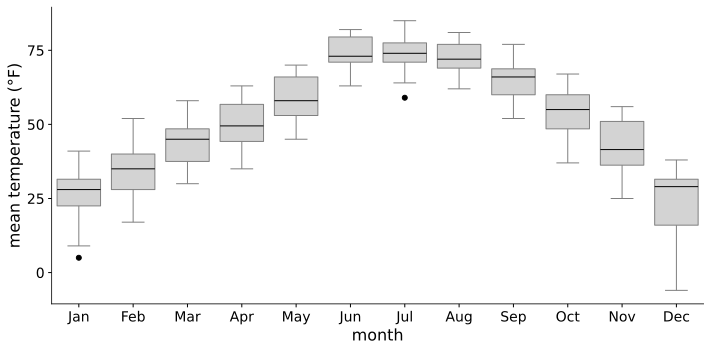

In [128]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='month_short', y='Mean Temperature [F]', data=lincoln_df, color='lightgrey',
            medianprops={'color': 'black', 'linewidth': 1}, order=month_order,
            flierprops={'marker': 'o', 'markerfacecolor': 'black', 'markersize': 5,
                        'markeredgecolor': 'black'},ax=ax)

ax.set_yticks([0, 25, 50, 75])
# Set the labels
ax.set_xlabel('month', fontsize=fs_m)
ax.set_ylabel('mean temperature (°F)', fontsize=fs_m)

ax.tick_params(axis='both', bottom=True, left=True, labelsize=fs_s, color='black',
                width=1.0)

sns.despine()

plt.tight_layout()

plt.show()

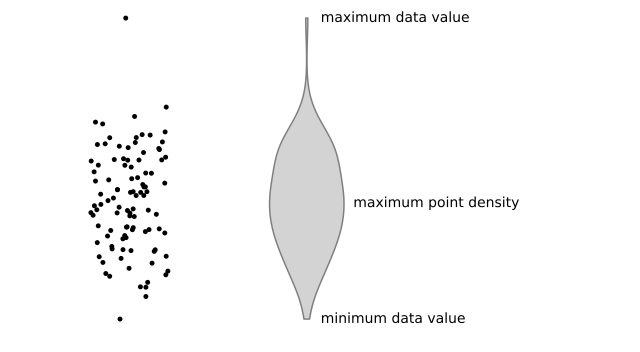

In [66]:
# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize_rect, gridspec_kw={'width_ratios': [0.65, 1]})

# Scatter plot
sns.stripplot(x=np.zeros(len(y)), y=y, jitter=0.2, color='black', ax=ax1)
ax1.set_xlim(-0.6, 0.6)
ax1.set_ylim(-2.6, 3.6)

ax1.set_xticks([])
ax1.set_yticks([])
ax1.tick_params(axis='both', bottom=False, left=False)

# Remove axis line
ax1.spines[:].set_visible(False)

# Box plot
sns.violinplot(x=np.ones(len(y)), y=y, color='lightgrey', cut=0.0, inner=None, linewidth=1.5, ax=ax2)
ax2.set_xlim(-0.5, 3.5)
ax2.set_ylim(-2.6, 3.6)

ax2.set_xticks([])
ax2.set_yticks([])
ax2.tick_params(axis='both', bottom=False, left=False)

ax2.spines[:].set_visible(False)

for x_pos, y_pos, text in [(0.15, np.min(y), 'minimum data value'), (0.5, 0.0, 'maximum point density'),
                   (0.15, np.max(y), 'maximum data value')]:
    ax2.text(x_pos, y_pos, text, ha='left', va='center', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

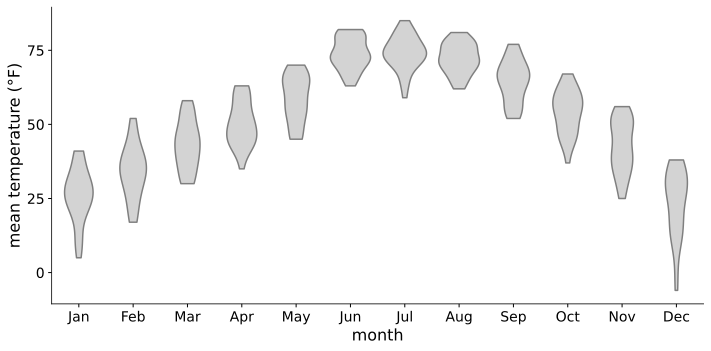

In [109]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(x='month_short', y='Mean Temperature [F]', data=lincoln_df, color='lightgrey',
               cut=0.0, inner=None, linewidth=1.5, ax=ax)

ax.set_yticks([0, 25, 50, 75])
# Set the labels
ax.set_xlabel('month', fontsize=fs_m)
ax.set_ylabel('mean temperature (°F)', fontsize=fs_m)

ax.tick_params(axis='both', bottom=True, left=True, labelsize=fs_s, color='black',
                width=1.0)

sns.despine()

plt.tight_layout()

plt.show()

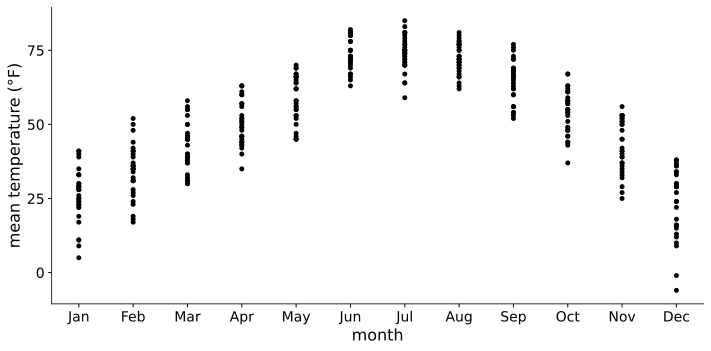

In [111]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.stripplot(x='month_short', y='Mean Temperature [F]', data=lincoln_df, jitter=0.,
              color='black', ax=ax)

ax.set_yticks([0, 25, 50, 75])
# Set the labels
ax.set_xlabel('month', fontsize=fs_m)
ax.set_ylabel('mean temperature (°F)', fontsize=fs_m)

ax.tick_params(axis='both', bottom=True, left=True, labelsize=fs_s, color='black',
                width=1.0)

sns.despine()

plt.tight_layout()

plt.show()

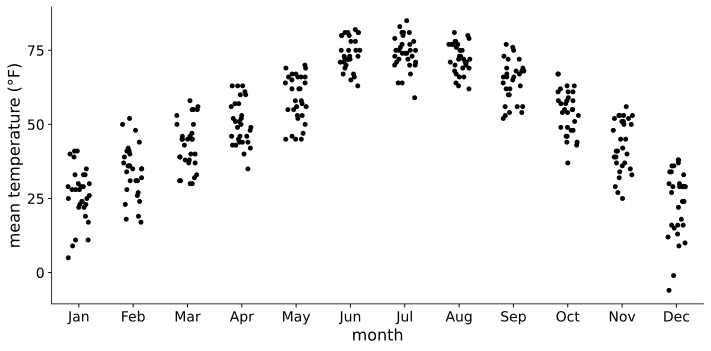

In [112]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.stripplot(x='month_short', y='Mean Temperature [F]', data=lincoln_df, jitter=0.2,
              color='black', ax=ax)

ax.set_yticks([0, 25, 50, 75])
# Set the labels
ax.set_xlabel('month', fontsize=fs_m)
ax.set_ylabel('mean temperature (°F)', fontsize=fs_m)

ax.tick_params(axis='both', bottom=True, left=True, labelsize=fs_s, color='black',
                width=1.0)

sns.despine()

plt.tight_layout()

plt.show()

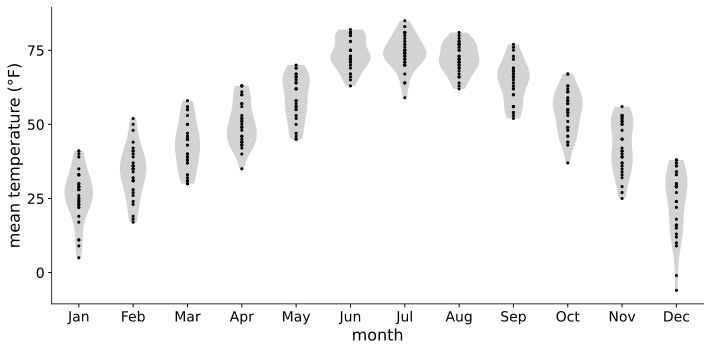

In [127]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(x='month_short', y='Mean Temperature [F]', data=lincoln_df, color='lightgrey',
               cut=0.0, inner='point', linewidth=0, ax=ax,
               inner_kws={'color': 'black', 'linewidth': 0, 's': 10}
               )

ax.set_yticks([0, 25, 50, 75])
# Set the labels
ax.set_xlabel('month', fontsize=fs_m)
ax.set_ylabel('mean temperature (°F)', fontsize=fs_m)

ax.tick_params(axis='both', bottom=True, left=True, labelsize=fs_s, color='black',
                width=1.0)

sns.despine()

plt.tight_layout()

plt.show()